<a href="https://colab.research.google.com/github/thopiyawan/DEMO_rami_dialogflow/blob/master/Copy_of_sklearn_topic_modeling_th_Base_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pwd

/content


In [ ]:
cd /content/drive/My Drive/SWU-Master-Thesis-63/Ploy/topicmodeling_thai

/content/drive/.shortcut-targets-by-id/1UHDKxOFjfONnMYU-auICT39cUoR5NF0D/SWU-Master-Thesis-63/Ploy/topicmodeling_thai


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 9.7MB 6.6MB/s 
Reason for being yanked: re-release with new wheels
     |████████████████████████████████| 2.8MB 39.0MB/s 
     |████████████████████████████████| 1.3MB 33.8MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 8.8MB 38.6MB/s 
     |████████████████████████████████| 10.6MB 20.0MB/s 
     |████████████████████████████████| 361.9MB 45kB/s 
     |████████████████████████████████| 2.0MB 27.9MB/s 
     |████████████████████████████████| 2.0MB 25.4MB/s 
     |████████████████████████████████| 296kB 56.7MB/s 
     |████████████████████████████████| 552kB 55.0MB/s 
     |████████████████████████████████| 153kB 49.0MB/s 
     |████████████████████████████████| 143kB 40.3MB/s 
     |████████████████████████████████| 92kB 10.4MB/s 
     |████████████████████████████████| 102kB 11.6MB/s 
     |████████████████████████████████| 102kB 12.1MB/s 
     |████████████████████████████████| 143kB 47.4MB/s 

In [ ]:
import time
start_time = time.time()

In [ ]:
import requests
from bs4 import BeautifulSoup
from time import  time, sleep
from random import randint

# from googletrans import Translator

from tqdm import tqdm
from tqdm import tqdm_notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from nltk import sent_tokenize, word_tokenize
from nltk.sentiment.vader import  SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
dataset = pd.read_csv("dataset/QA_pregnancy.csv",encoding='utf8')
print(dataset.shape)
dataset.head()


(9987, 5)


question  ...                                             answer
0                                          ตั้งครรภ์  ...  เราได้รับคำถามของคุณแล้ว รอทีมแพทย์มาตอบคำถามส...
1                ตั้งครรภ์5เดือนสามารถตัดปากมดได้ไหม  ...                                                NaN
2  ตั้งครรภ์14สัปดาค่ะปวดท้องเหนือสะดือเเนวยาวร่อ...  ...                                                NaN
3  ตั้งครรภ์24สัปดาห์โดนหมากัดที่ขามีรอยถลอกต้องไ...  ...  วัคซีนพิษสุนัทบ้าและอิมมูโนโกลบูลินสามารถให้ใน...
4  ตั้งครรภ์ แต่ได๋อัลตราซาวด์ดูหมอบอกมีเลือกออกบ...  ...  รบกวนขอข้อมูลเพพิ่มเติมด้วยครับ คุณแม่อายุเท่า...

[5 rows x 5 columns]

In [ ]:
dataset.describe()

question  ...                                             answer
count                                                9987  ...                                               9529
unique                                               9891  ...                                               8995
top     สอบถามค่ะ คือ ประจำเดือนหมดไปเมื่อวันที่ 5เดือ...  ...  สวัสดีค่ะ คำถามของคุณอาจกว้างเกินไป ทำให้คุณหม...
freq                                                    3  ...                                                195

[4 rows x 5 columns]

In [ ]:
print(dataset.shape)
print("===============================================")
print(dataset.info())

(9987, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  9987 non-null   object
 1   href      9987 non-null   object
 2   date_ask  9982 non-null   object
 3   user      9986 non-null   object
 4   answer    9529 non-null   object
dtypes: object(5)
memory usage: 390.2+ KB
None


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [ ]:
#dev version
# !pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip

# release version 
! pip install pythainlp

!pip install epitran
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

     |████████████████████████████████| 11.0MB 7.6MB/s 
     |████████████████████████████████| 747kB 32.9MB/s 
     |████████████████████████████████| 143kB 6.4MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 1.2MB 15.4MB/s 
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-cp37-none-any.whl size=10768 sha256=4cd5d5c71f775e9d40a1f6527ea18ef75a7f65e725090df4fe75c9869bdbd2cb
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
Successfully built unicodecsv
  Using cached https://files.pythonhosted.org/packages/ef/f3/ecda1d7dc51da0689b2df3d002541d0d04ac4db02c5d148eca48c8e3d219/deepcut-0.7.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f6/56/4ab7204bde7468be65d047578192975035d9bc4e786990a407a28a8f75b8/attacut-1.0.6-py3-none-any.whl
     |████████████████████████████████| 481kB 8.2MB/s 
  Using cached https://files.pythonhosted.org/packages/11/07/a1

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pythainlp

pythainlp.__version__

'2.3.1'

In [ ]:
import re, string, unicodedata

In [ ]:
from pythainlp import sent_tokenize, word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize
from pythainlp.spell import correct


stopwords = list(thai_stopwords())


In [ ]:
dataset = dataset[['question','user']]
dataset['index'] = dataset.index
dataset 

question  ... index
0                                             ตั้งครรภ์  ...     0
1                   ตั้งครรภ์5เดือนสามารถตัดปากมดได้ไหม  ...     1
2     ตั้งครรภ์14สัปดาค่ะปวดท้องเหนือสะดือเเนวยาวร่อ...  ...     2
3     ตั้งครรภ์24สัปดาห์โดนหมากัดที่ขามีรอยถลอกต้องไ...  ...     3
4     ตั้งครรภ์ แต่ได๋อัลตราซาวด์ดูหมอบอกมีเลือกออกบ...  ...     4
...                                                 ...  ...   ...
9982  คุณหมอคะ หลังจากที่เรามีเพศสัมพันธ์ กี่วันคะ จ...  ...  9982
9983  ประจำเดือนขาดมาครั้งสุดท้ายเมื่อต้นเมษายนค่ะ แ...  ...  9983
9984                                   รับทำแท้งมั้ยค่ะ  ...  9984
9985  เดือนพคประจำเดือนมาช่วงต้นเดือนและกลางเดือน2รอ...  ...  9985
9986  อายุ 29 เคยเป็นหูดหงอนไก่ได้ทำการรักษาแล้ว ต่อ...  ...  9986

[9987 rows x 3 columns]

In [ ]:
dataset['question'].tail(20)

9967    คือหนูอายุ14ปีค่ะ แล้วประจำเดือนมา20 กว่าวันแล...
9968    สวัสดีค่ะ คือประจำหนูขาดมา36วันแล้วนับจากประจำ...
9969    มีเพศสัมพันธ์วันที่5พคหลั่งนอกทานยาคุมฉุกเฉินต...
9970    ผมมีเพศสัมพันธ์ กับคนที่ไม่รู้จัก แล้วผมมีอากา...
9971    เป็นอีสุกอีใสมีไข้นิดหน่อยแต่อ่อนเพลียตอนนี้เป...
9972    มีอะไรกันกีบเเฟน แต่ป้องกันคับ ใส่ถุง เเต่ถุงย...
9973    หมอค่ะ คือหนูกินยาคุมกำเนิดของซูซี่21เม็ดมาประ...
9974    คือมีอะไรกับเเฟนครับ เเล้วรีบไปซื้อยาคุม zarin...
9975    มีเพศสัมพันธ์กับแฟนวันที่7 มิย หลั่งนอก ทานยาค...
9976    สวัสดีครับคุณหมอพอดีผมมีเพศสัมพันธุ์กับแฟนวันท...
9977    ประจำเดือนไม่มา4เดือนแล้วค่ะ ซื้อที่ตรวจครรภ์ม...
9978    ถ้ากินยาคุมฉุกเฉินไปแล้ว ประจำเดือน ไม่มาแต่มา...
9979    คือวันที่20 พฤษภาคมมีเพศสัมพันธุ์กับแฟนโดยสวมถ...
9980    สอบถามคุณหมอค่ะ ดิฉันอายุ 25 ปี เพิ่งขูดมดลูกไ...
9981    เมื่อวันที่ 22 เมยมีอะไรกับแฟนแล้วถุงยางรั่วตอ...
9982    คุณหมอคะ หลังจากที่เรามีเพศสัมพันธ์ กี่วันคะ จ...
9983    ประจำเดือนขาดมาครั้งสุดท้ายเมื่อต้นเมษายนค่ะ แ...
9984          

In [ ]:
from sklearn import preprocessing

In [ ]:

import pandas as pd
import numpy as np
import time
from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime
import calendar
import scipy.stats
from datetime import timedelta, date
import pytz
from pytz import timezone
import multiprocessing
from multiprocessing import cpu_count #For Parallel
import re


cores = cpu_count() #Number of CPU cores on your system
partitions = cores #Define as many partitions as you want to run parallel

# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def parallelize(data, func):
    data_split = np.array_split(data, partitions)
    pool = multiprocessing.Pool(cores)     #สร้าง multiprocessor จำนวนเท่ากับ core cpu ของ server
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

#ตัดคำ
def preprocess(documents):
    # replace_word = ['เพศสัมพันธุ์','เพศสัมพัน','เพสสัมพัน']
    list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ']
                 
    #list_words = []
    result = []
    for token in word_tokenize(documents, engine='newmm'): 
        token = token.strip()
        token = correct(token)
        if token not in stopwords and len(token) >5 and token not in list_words:
            # token = correct(token)
            # token = token.replace('สัมพันธุ์','สัมพันธ์')
            # token = token.replace('สัมพัน','สัมพันธ์')
            # token = token.replace('สัมพันธ์ธ์','สัมพันธ์')
            # token = token.replace('เพส','สัมพันธ์')
            # token = correct(str(token))
            result.append(token)
    return result


def func(documents):
    res = documents['headline_text'].map(preprocess)
    return res

def cleanText(documents):
    documents['headline_text'] = documents['headline_text'].str.replace('|',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\\',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\/',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('.',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('_','')
    documents['headline_text'] = documents['headline_text'].str.replace('\d+', '')
    documents['headline_text'] = documents['headline_text'].str.replace('-',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    pattern = '|'.join(['&', '%', ';', '='])
    documents['headline_text'] = documents['headline_text'].str.replace(pattern, ' ')
    # documents = documents.loc[~documents['headline_text'].str.contains('img')]
    documents.headline_text.replace({r'[^ก-๙]':''}, regex=True, inplace=True)
    documents.headline_text.replace({u"[^\u0E00-\u0E7Fa-zA-Z' ]|^'|'$|''"}, regex=True, inplace=True)
    documents['headline_text'] = documents['headline_text'].str.replace(':',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('#',' ')
    documents['headline_text'] = documents['headline_text'].str.strip()
    documents = documents.loc[documents['headline_text']!= ""]
    documents = documents.dropna().reset_index(drop=True)
    return documents


In [ ]:
dataset = dataset.iloc[:,:]
documents = dataset.copy()
documents = documents.rename(columns={'question':'headline_text'})

documents = documents.groupby('user')['headline_text'].agg(lambda col: ' '.join(col)).reset_index()
print(documents.shape[0])
documents.head()



8251


user                                      headline_text
0         \nHonestDocs User \n  ตั้งครรภ์35week่ท้องแข็งบ่อยมากจะมีอันตรายกับเ...
1  \nHonestDocs User 1000031\n  รบกวนสอบถามหน่อยค่ะ มีเพศสัมพันธ์ประมาณวันที่ ...
2  \nHonestDocs User 1000061\n  ถ้าผมช่วยตัวเองเสร็จก่อนหน้าแล้วผมใช้ผ้าเช็ดน้...
3  \nHonestDocs User 1000074\n  ถ้ายังไม่พร้อมมีลูกทำแท้งผิดกฎหมายไหมครับ ปลอา...
4  \nHonestDocs User 1000159\n  สวัสดีค่ะคุณหมอ พอดีว่าปกติเป็นคนทานยาคุมพรีม2...

In [ ]:
documents = parallelize(documents,cleanText)
documents.head()


user                                      headline_text
0         \nHonestDocs User \n  ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในค...
1  \nHonestDocs User 1000031\n  รบกวนสอบถามหน่อยค่ะมีเพศสัมพันธ์ประมาณวันที่แล...
2  \nHonestDocs User 1000061\n  ถ้าผมช่วยตัวเองเสร็จก่อนหน้าแล้วผมใช้ผ้าเช็ดน้...
3  \nHonestDocs User 1000074\n  ถ้ายังไม่พร้อมมีลูกทำแท้งผิดกฎหมายไหมครับปลอาย...
4  \nHonestDocs User 1000159\n  สวัสดีค่ะคุณหมอพอดีว่าปกติเป็นคนทานยาคุมพรีมเม...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def cleanText(text):
  text = str(text)
  text = re.sub('[^ก-๙]','',text)
  stop_word = list(thai_stopwords())
  sentence = word_tokenize(text, engine='newmm')
  list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','ผู้เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ','แล้วก็','แบบนี้']
  result = [word for word in sentence if word not in stop_word and len(word) > 5 and " " not in word and word not in list_words]
  return "/".join(result)

def tokenize(d):
  result = d.split("/")
  result = list(filter(None, result))
  return result

new_text = []
for txt in documents["headline_text"]:
  new_text.append(cleanText(txt))

vectorizer = CountVectorizer(analyzer='word', max_df = 1.0, min_df = 1,stop_words=stopwords, token_pattern='[a-zA-Z0-9]{3,}',  tokenizer=tokenize )
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

word  count
937      ประจำเดือน   5721
567       ตั้งครรภ์   2412
1177  มีเพศสัมพันธ์   2159
1180        มีโอกาส   1477
418         ฉุกเฉิน   1247
360          คุณหมอ   1217
654          ถุงยาง    895
1001        ป้องกัน    790
1211    ยาคุมกำเนิด    521
1628    หลังจากนั้น    416

In [ ]:
keyword_df2.shape

(2520, 2)

In [ ]:
keyword_df2.sum()

word     กฎหมายกพเเล้วกยเเล้วกรณีย์กรณีศึกษากรรมพันธุ์ก...
count                                                41535
dtype: object

In [ ]:
print(new_text)

['ตั้งครรภ์/ท้องแข็ง/อันตราย/ตั้งครรภ์/ท้องน้อย/อวัยวะเพศ/ตั้งครรภ์/มีประโยชน์/มีผลกระทบ/ตั้งครรภ์/สาเหตุ/ตั้งครรภ์/อันตราย/ตั้งครรภ์/ตั้งครรภ์/ออกกำลังกาย/ตั้งครรภ์/คุกคาม/ล้างหน้า/ชาวบ้าน/ตั้งครรภ์/ผิดปกติ/ตั้งครรภ์/หัดเยอรมัน/ตั้งครรภ์/คร้ำไม/ตั้งครรภ์/ความผิดปกติ/โครโมโซม/ความเสี่ยง/เป็นโรค/น้ำคร่ำ/ตั้งครรภ์/ปวดท้อง/ไม่เป็นอะไร/ปวดท้อง/ท้องแข็ง/เป็นอันตราย/ประจำเดือน/คุมกำเนิด/ตั้งครรภ์/เวลานอน/เพราะอะไร/เป็นโรค/ตั้งครรภ์/ผลกระทบ/ตั้งครรภ์/หน่ววๆ/อวัยวะเพศ/อยากรู้/ผู้หญิง/ตั้งครรภ์/ใหมคร๊/ตั้งครรภ์/คุมกำเนิด/ตั้งครรภ์/ตอนที่/ตั้งครรภ์/สุขภาพ/มีผลกระทบ/หรือว่า/เกิดขึ้น/ตั้งครรภ์/เกิดขึ้น/ตั้งครรภ์/ขนอ่อน/โดยเฉพาะ/หน้าท้อง/ตั้งครรภ์/เวลานอน/นอนตะแคง/ตั้งครรภ์/น้ำหนัก/น้ำหนัก/ผิดปกติ/เป็นโรค/ตั้งครรภ์/มีสิทธิ์/เป็นโรค/ตั้งครรภ์/เวลานอน/อยากรู้/เพราะอะไร/ตั้งครรภ์/รับประทาน/ประเภท/แข็งแรง/ผู้หญิง/ตั้งครรภ์/คุณแม่/ตั้งครรภ์/ยาระบาย/ท้องผูก/คุณแม่/คาเฟอีน/ที่อยู่/ตั้งครรภ์/ตั้งครรภ์/มีผลต่อ/ป้องกัน/อย่างไรบ้าง/ตั้งครรภ์/ถึงกำหนด/ถึงกับ/สูญเสีย/ที่สอง/คลอดลูก/เป็นปกติ/อันตราย/ผู้หญิง/โรงพ

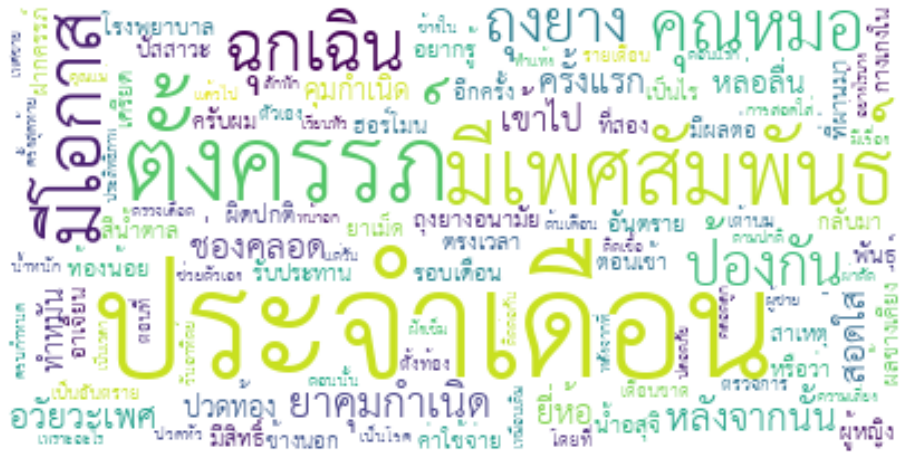

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_dict = {}
for i in range(0,len(keyword_df2)):
   word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path='dataset//THSarabunNew.ttf',background_color ='white',max_words=100,collocations=False).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()
fig.savefig("wordclod-paper.png")

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 40.067622900009155 seconds ---


bubble แต่ละอันคือ topic <br>
bubble ที่ใหญ่จะมีความแพร่หลายและโดดเด่นมาก <br>

รูปแบบหัวข้อที่ดีจะเป็นหัวข้อที่ค่อนข้างใหญ่ซึ่งกระจัดกระจายอยู่ในควอดแดรนต์ที่แตกต่างกันแทนที่จะกระจุกอยู่ในจตุภาคเดียว  <br>

- The model with too many topics will have many overlaps, small sized bubbles clustered in one region of chart.
- If you move the cursor the different bubbles you can see different keywords associated with topics.

In [ ]:
!pip3 install spacy
!python3 -m spacy download en #Language model
!pip3 install gensim # For topic modeling
!pip install pyLDAvis==2.1.2 # For visualizing topic models


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 1.6MB 9.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=dc98eab5da17b85425b9757b1b988cfe662f6e010e7b4d3aca728d7d1a474eb9
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
# Run in terminal or command prompt
# python3 -m spacy download en
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
df = documents.dropna(subset=['headline_text'])

In [ ]:
# Convert to list
data = df.headline_text.values.tolist()
# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]
pprint(data[:1])

['ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในครรภ์มั้ยคะตั้งครรภ์สัปดาห์เจ็บหน่วงบริเวณท้องน้อยและอวัยวะเพศต้องทำไงตั้งครรภ์ควรดื่มนมวัวมั้ยคะมีประโยชน์แบะมีผลกระทบการดื่มนมวัวมากไปหรือไม่ต่อเด็กในครรภ์ตั้งครรภ์แล้วรกต่ำสาเหตุเกิดจากอะไรคะตั้งครรภ์เดือนกว่ามีตกขาวมาตลอดจะอันตรายกับลูกในครรภ์ไหมคะตั้งครรภ์สัปดาห์ลูกไม่ดิ้นเป็นอะไรหรือป่าวคะตั้งครรภ์สัปดาห์สามารถออกกำลังกายอะไรได้บ้างคะที่จะให้ลูกในครรภ์และแม่เเข็งแรงตั้งครรภ์สัปดาห์เจอภาวะแท้งคุกคามหรือจริงๆแล้วเปนแค่ปคะจำเดือนล้างหน้าเด็กแบบที่ชาวบ้านเรียกตอนนี้ไหลมาวันแล้วตั้งครรภ์เดือนครึ่งทำไมใหญ่เหมือนเดือนค่ะผิดปกติหรือเปล่าค่ะตั้งครรภ์สัปดาห์แล้วตรวจพบเชื้อหัดเยอรมันกลัวมีผลกับทารกอายุตั้งครรภ์จะเดือนต้องเจาะน้ำคร้ำไมคะตั้งครรภ์เจาะเลือดหาความผิดปกติของโครโมโซมลูกพบมีความเสี่ยงเป็นโรคเทอร์เนอร์ถ้าเจาะน้ำคร่ำผลจะเป็นตามที่เจาะเลือดไหมคะกลัวมากตั้งครรภ์สัปดาห์มีอาการปวดท้องตลอดแต่พอทนไหวเคยไปพบหมอหมอว่ารกเกาะต่ำไม่เป็นอะไรแต่ทำไมยังปวดท้องอยู่เรื่อยๆท้องแข็งบ่อยๆจะเป็นอันตรายตาอลูกไหมค่ะคือตอนนี้ประจำเดือนมาได้เดือนแล้วแต่คุมกำเน

In [ ]:
data

['ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในครรภ์มั้ยคะตั้งครรภ์สัปดาห์เจ็บหน่วงบริเวณท้องน้อยและอวัยวะเพศต้องทำไงตั้งครรภ์ควรดื่มนมวัวมั้ยคะมีประโยชน์แบะมีผลกระทบการดื่มนมวัวมากไปหรือไม่ต่อเด็กในครรภ์ตั้งครรภ์แล้วรกต่ำสาเหตุเกิดจากอะไรคะตั้งครรภ์เดือนกว่ามีตกขาวมาตลอดจะอันตรายกับลูกในครรภ์ไหมคะตั้งครรภ์สัปดาห์ลูกไม่ดิ้นเป็นอะไรหรือป่าวคะตั้งครรภ์สัปดาห์สามารถออกกำลังกายอะไรได้บ้างคะที่จะให้ลูกในครรภ์และแม่เเข็งแรงตั้งครรภ์สัปดาห์เจอภาวะแท้งคุกคามหรือจริงๆแล้วเปนแค่ปคะจำเดือนล้างหน้าเด็กแบบที่ชาวบ้านเรียกตอนนี้ไหลมาวันแล้วตั้งครรภ์เดือนครึ่งทำไมใหญ่เหมือนเดือนค่ะผิดปกติหรือเปล่าค่ะตั้งครรภ์สัปดาห์แล้วตรวจพบเชื้อหัดเยอรมันกลัวมีผลกับทารกอายุตั้งครรภ์จะเดือนต้องเจาะน้ำคร้ำไมคะตั้งครรภ์เจาะเลือดหาความผิดปกติของโครโมโซมลูกพบมีความเสี่ยงเป็นโรคเทอร์เนอร์ถ้าเจาะน้ำคร่ำผลจะเป็นตามที่เจาะเลือดไหมคะกลัวมากตั้งครรภ์สัปดาห์มีอาการปวดท้องตลอดแต่พอทนไหวเคยไปพบหมอหมอว่ารกเกาะต่ำไม่เป็นอะไรแต่ทำไมยังปวดท้องอยู่เรื่อยๆท้องแข็งบ่อยๆจะเป็นอันตรายตาอลูกไหมค่ะคือตอนนี้ประจำเดือนมาได้เดือนแล้วแต่คุมกำเน

In [ ]:
def cleanText(text):
  text = str(text)
  text = re.sub('[^ก-๙]','',text)
  stop_word = list(thai_stopwords())
  sentence = word_tokenize(text, engine='newmm')
  list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','ผู้เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ']
  result = [word for word in sentence if word not in stop_word and len(word) >5 and " " not in word and word not in list_words]
  # result = [word for word in sentence if word not in stop_word and len(word) >5 and " " not in word]
  return " ".join(result)

def tokenize(d):
  result = d.split(" ")
  result = list(filter(None, result))
  return result

data_words = []
for txt in documents['headline_text']:
  data_words.append(cleanText(txt))

# vectorizer = CountVectorizer(tokenizer=tokenize)
# transformed_data = vectorizer.fit_transform(new_text)
# count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
# keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
# keyword_df2['word'] = vectorizer.get_feature_names()
# keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
# keyword_df2.sort_values(by=['count'], ascending=False).head(10)


In [ ]:
vectorizer = CountVectorizer(analyzer='word', max_df = 1.0, min_df = 1,stop_words=stopwords, token_pattern='[a-zA-Z0-9]{3,}',  tokenizer=tokenize )

# num chars > 3
                             # max_features=50000,             
# max number of uniq words    )
data_vectorized = vectorizer.fit_transform(data_words)

In [ ]:
data_vectorized.shape

(8248, 2522)

In [ ]:
data_vectorized


<8248x2522 sparse matrix of type '<class 'numpy.int64'>'
	with 34477 stored elements in Compressed Sparse Row format>

In [ ]:
transformed_data = vectorizer.fit_transform(data_words)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

word  count
937      ประจำเดือน   5721
567       ตั้งครรภ์   2412
1177  มีเพศสัมพันธ์   2159
1180        มีโอกาส   1477
418         ฉุกเฉิน   1247
360          คุณหมอ   1217
654          ถุงยาง    895
2330         แบบนี้    799
1001        ป้องกัน    790
1211    ยาคุมกำเนิด    521

In [ ]:
keyword_df2.shape


(2522, 2)

In [ ]:
keyword_df2.sum()

word     กฎหมายกพเเล้วกยเเล้วกรณีย์กรณีศึกษากรรมพันธุ์ก...
count                                                42757
dtype: object

In [ ]:
matrix = vectorizer.fit_transform(data_words)

words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names())
words_df.head()

กฎหมาย  กพเเล้ว  กยเเล้ว  กรณีย์  ...  ๆเเน่น  ๆเเล้ว  ๆๆเเต่  ําเนิด
0       0        0        0       0  ...       0       0       0       0
1       0        0        0       0  ...       0       0       0       0
2       0        0        0       0  ...       0       0       0       0
3       0        0        0       0  ...       0       0       0       0
4       0        0        0       0  ...       0       0       0       0

[5 rows x 2522 columns]

In [ ]:
len(vectorizer.get_feature_names())

2522

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 15 topics
n_topics = 4
model = LatentDirichletAllocation(n_components=n_topics)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 4
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: ฉุกเฉิน มีเพศสัมพันธ์ ถุงยาง มีโอกาส
Topic 1: ประจำเดือน มีเพศสัมพันธ์ มีโอกาส ตั้งครรภ์
Topic 2: ช่องคลอด สอดใส่ มีโอกาส อวัยวะเพศ
Topic 3: ตั้งครรภ์ คุณหมอ ยาคุมกำเนิด ยี่ห้อ


In [ ]:
# Convert our counts into numbers
amounts = model.transform(matrix) * 100

# Set it up as a dataframe
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head(2)

topic_ฉุกเฉิน_มีเพศสัมพันธ์_ถุงยาง  ...  topic_ตั้งครรภ์_คุณหมอ_ยาคุมกำเนิด
0                            0.015206  ...                           63.898072
1                            5.642435  ...                            5.010676

[2 rows x 4 columns]

In [ ]:

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=4, max_iter=10,learning_method='online', random_state=100,  batch_size=128, n_jobs = -1,  learning_offset=50.)    # Number of topics
                                                    
# Max learning iterations                                                                              
# Random state                                            
# n docs in each learning iter                                      
# compute perplexity every n iters, default: Don't                                       
# Use all available CPUs
                                     

lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -234159.4567752922
Perplexity:  239.01288291146773
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
lda_output.shape

(8248, 4)

In [ ]:
# Define Search Param
search_params = {'n_components': [100, 500], 'learning_decay': [.5, .7, .9]}
# Init the Model
# lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=10)
# Init Grid Search Class
model = GridSearchCV(lda_model, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=50., max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=-1, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       iid=True, n_jobs=1,
       param_grid={'n_topics': [100, 500], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method=None,
                                                 learning_offset=50.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=-1,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 total

In [ ]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 100}
Best Log Likelihood Score:  -95110.86184010506
Model Perplexity:  604.2258871233987


In [ ]:
results = pd.DataFrame(model.cv_results_)

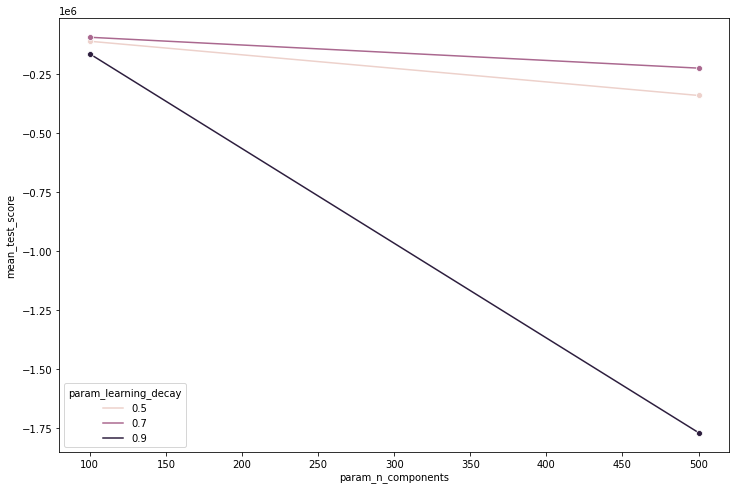

In [57]:


plt.figure(figsize=(12,8))

sns.lineplot(data=results,
             x='param_n_components',
             y='mean_test_score',
             hue='param_learning_decay',
             # https://github.com/mwaskom/seaborn/issues/1515
            
             marker='o'
            )

# # Would need a good way to show three error bars
# plt.errorbar(x=results['param_n_components'],
#              y=results.mean_test_score,
#              yerr=results.std_test_score,
#              fmt='none',
#              color=current_palette[0])

plt.show()

In [58]:
print(data_vectorized)

  (0, 567)	216
  (0, 775)	14
  (0, 1711)	34
  (0, 765)	12
  (0, 1698)	5
  (0, 1165)	1
  (0, 1167)	14
  (0, 1527)	30
  (0, 1702)	2
  (0, 357)	3
  (0, 1409)	1
  (0, 431)	1
  (0, 1023)	29
  (0, 1643)	2
  (0, 277)	1
  (0, 311)	2
  (0, 2377)	3
  (0, 329)	8
  (0, 2018)	15
  (0, 855)	7
  (0, 968)	16
  (0, 2503)	1
  (0, 2011)	25
  (0, 937)	76
  (0, 362)	5
  :	:
  (8240, 1504)	1
  (8240, 35)	1
  (8240, 1529)	1
  (8240, 605)	1
  (8241, 937)	2
  (8242, 567)	1
  (8242, 1080)	1
  (8243, 937)	1
  (8243, 873)	1
  (8243, 1001)	1
  (8243, 1177)	2
  (8243, 1595)	1
  (8243, 1808)	1
  (8244, 937)	1
  (8244, 266)	1
  (8245, 937)	1
  (8246, 567)	1
  (8246, 1057)	1
  (8246, 372)	1
  (8246, 542)	1
  (8246, 1280)	1
  (8247, 2416)	1
  (8247, 714)	1
  (8247, 421)	1
  (8247, 1530)	1


In [59]:
data_vectorized

<8248x2522 sparse matrix of type '<class 'numpy.int64'>'
	with 34477 stored elements in Compressed Sparse Row format>

In [60]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'lack'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(50).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [61]:
df_document_topics.to_excel('styled.xlsx', engine='openpyxl')

In [62]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()
df_topic_keywords.to_csv("vector_text_LDA.csv")

In [63]:
df_topic_keywords

กฎหมาย   กพเเล้ว   กยเเล้ว  ...    ๆเเล้ว    ๆๆเเต่    ําเนิด
Topic0   0.010002  0.010002  0.010002  ...  0.010002  0.010002  0.010002
Topic1   0.010002  0.010002  0.010002  ...  0.010009  1.036223  0.745882
Topic2   0.010002  0.010002  0.010002  ...  0.010002  0.010002  0.010002
Topic3   0.010002  0.010002  0.010002  ...  0.010002  0.010002  0.010002
Topic4   0.010002  0.010002  0.010002  ...  0.010002  0.010002  0.010002
...           ...       ...       ...  ...       ...       ...       ...
Topic95  0.010002  0.010002  0.010002  ...  0.010002  0.010002  0.010002
Topic96  0.010002  0.010002  0.010002  ...  0.010002  0.010002  0.010002
Topic97  0.010003  0.010002  0.010002  ...  0.010002  0.010002  0.010001
Topic98  0.010002  0.010002  0.010002  ...  0.010002  0.010002  0.010002
Topic99  0.010002  0.010002  0.010002  ...  0.010002  0.010002  0.010002

[100 rows x 2522 columns]

In [64]:
df_topic_VECTOR = df_topic_keywords 

In [65]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0       Word 1  ...      Word 13      Word 14
Topic 0           ขออภัย      ขนมหวาน  ...      เข้าตู้    จากนั้นมา
Topic 1           ยี่ห้อ      ตรงเวลา  ...       ที่สาม       ตอนแรก
Topic 2           ละเมิด       ติดโรค  ...     ร้านกาแฟ   ธรรมศาสตร์
Topic 3         งบประมาณ    เลือดเสีย  ...       ขอร้อง       ที่สูง
Topic 4           ตัวเอง       เเล้วเ  ...       ถุงยาง  ทางการแพทย์
...                  ...          ...  ...          ...          ...
Topic 95          ทำหมัน   ค่าใช้จ่าย  ...    เตรียมตัว   รายละเอียด
Topic 96      โรคกระเพาะ       คาดเดา  ...       เปิ้อน      เป็นตัว
Topic 97       สิ้นเดือน     ช่วงเวลา  ...       รู้จัก      อุลตร้า
Topic 98         น้ำผึ้ง  น้ำส้มสายชู  ...  โดยธรรมชาติ      ขนมหวาน
Topic 99  การเจริญเติบโต       ปากทาง  ...    เป็นประจำ   ไข้ทับระดู

[100 rows x 15 columns]

In [66]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=4, random_state=100).fit_predict(lda_output)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.    0.06  0.    0.    0.01  0.    0.    0.    0.    0.    0.    0.
   0.01  0.    0.    0.01  0.02  0.    0.    0.01  0.    0.    0.    0.
   0.    0.    0.04  0.03  0.    0.    0.    0.    0.    0.01  0.    0.01
   0.    0.    0.01  0.    0.    0.    0.    0.    0.01  0.    0.    0.
   0.    0.    0.    0.    0.    0.06  0.    0.    0.    0.    0.    0.
   0.08  0.05  0.01  0.01  0.    0.    0.    0.    0.01  0.    0.    0.
   0.99  0.01  0.03  0.    0.    0.01  0.    0.    0.    0.    0.    0.
   0.03  0.01  0.    0.01  0.    0.    0.    0.03  0.    0.    0.    0.01
   0.    0.01  0.    0.  ]
 [ 0.01  0.1   0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.03  0.01  0.01  0.01  0.03  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.01  0.01  0.07  0.03  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.02
   0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.01  0.01  0.01  0.01  0.01  0.64  0.01  0.01  0.01  0.01  0.01  0.01


In [67]:
lda_output

array([[5.63063063e-06, 8.53605374e-03, 5.63063063e-06, ...,
        3.30013604e-03, 5.63063063e-06, 5.63063063e-06],
       [2.00000000e-03, 2.00000000e-03, 2.00000000e-03, ...,
        2.00000000e-03, 2.00000000e-03, 2.00000000e-03],
       [9.09090909e-04, 9.09090909e-04, 9.09090909e-04, ...,
        9.09090909e-04, 9.09090909e-04, 9.09090909e-04],
       ...,
       [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
        5.00000000e-03, 5.00000000e-03, 5.00000000e-03],
       [1.66666667e-03, 1.66666667e-03, 1.66666667e-03, ...,
        1.66666667e-03, 1.66666667e-03, 1.66666667e-03],
       [2.00000000e-03, 2.00000000e-03, 2.00000000e-03, ...,
        2.00000000e-03, 2.00000000e-03, 2.00000000e-03]])

In [68]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(lda_output)
data_transformed = mms.transform(lda_output)
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1],
                 c=labels.astype(np.float))
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')

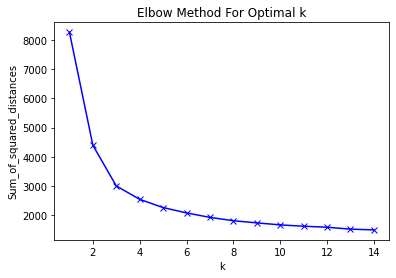

In [69]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
data_transformed

array([[0.        , 0.00979041, 0.        , ..., 0.00424772, 0.        ,
        0.        ],
       [0.00394929, 0.00217653, 0.00394929, ..., 0.00251973, 0.00394929,
        0.1995493 ],
       [0.00178905, 0.00090573, 0.00178905, ..., 0.00106981, 0.00178905,
        0.09039693],
       ...,
       [0.00988995, 0.00567124, 0.00988995, ..., 0.00650699, 0.00988995,
        0.49971831],
       [0.00328922, 0.00178823, 0.00328922, ..., 0.0020767 , 0.00328922,
        0.16619718],
       [0.00394929, 0.00217653, 0.00394929, ..., 0.00251973, 0.00394929,
        0.1995493 ]])

In [71]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(lda_output)
data_transformed = mms.transform(lda_output)
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1],
                 c=labels.astype(np.float))
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')

Para n_clusters = 2 O score_silhouette médio é : 0.5163507479206483
Para n_clusters = 3 O score_silhouette médio é : 0.37566610431674013
Para n_clusters = 4 O score_silhouette médio é : 0.2680859757328566
Para n_clusters = 5 O score_silhouette médio é : 0.25863007250510583
Para n_clusters = 6 O score_silhouette médio é : 0.28058197072031216
Para n_clusters = 7 O score_silhouette médio é : 0.2694167202932468
Para n_clusters = 8 O score_silhouette médio é : 0.2547629978881436
Para n_clusters = 9 O score_silhouette médio é : 0.28793748718254286


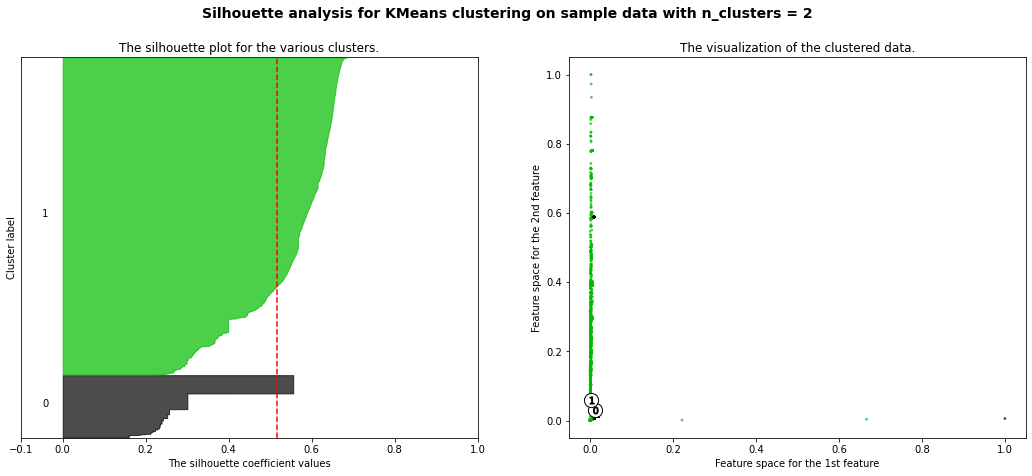

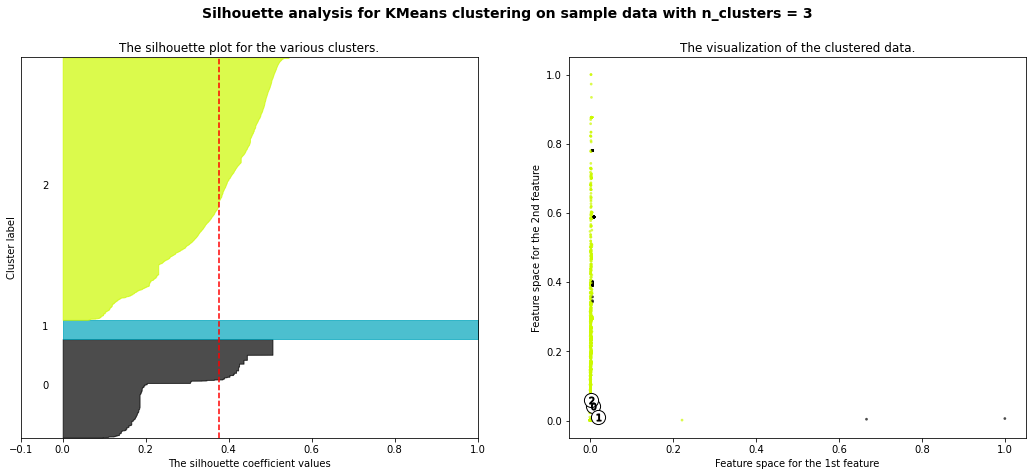

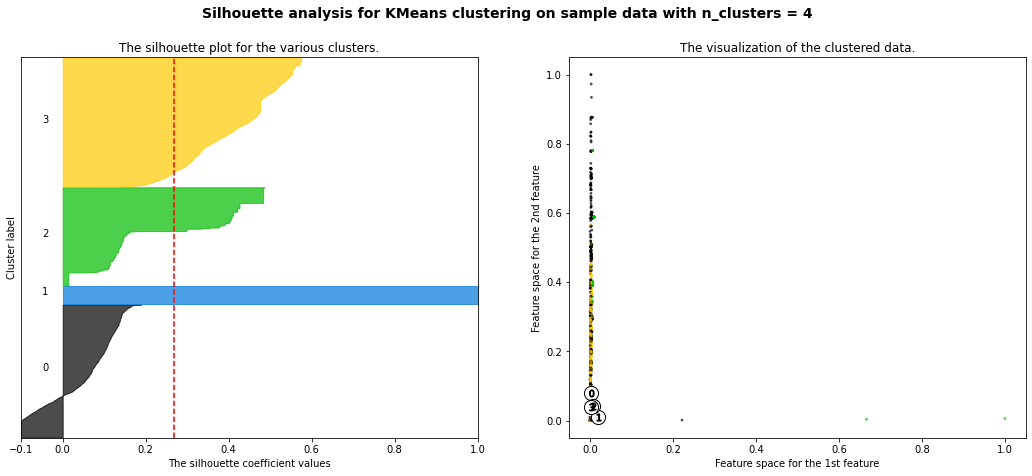

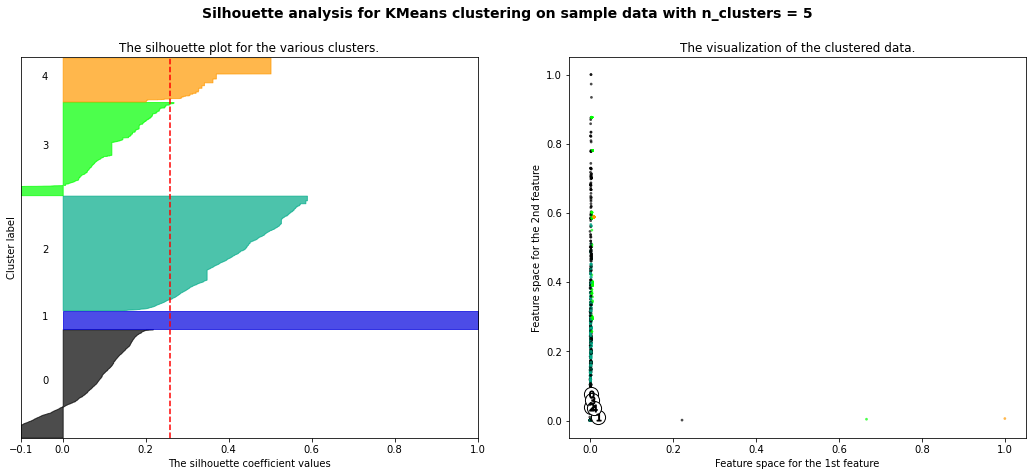

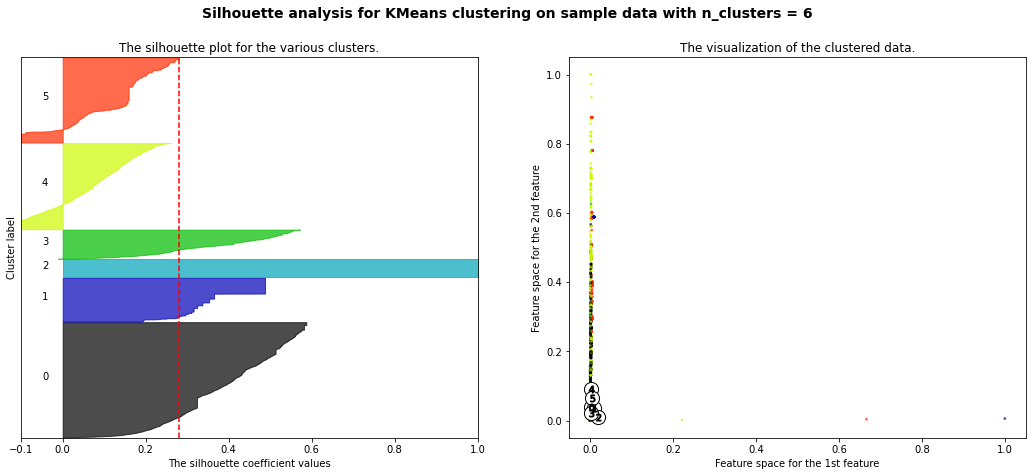

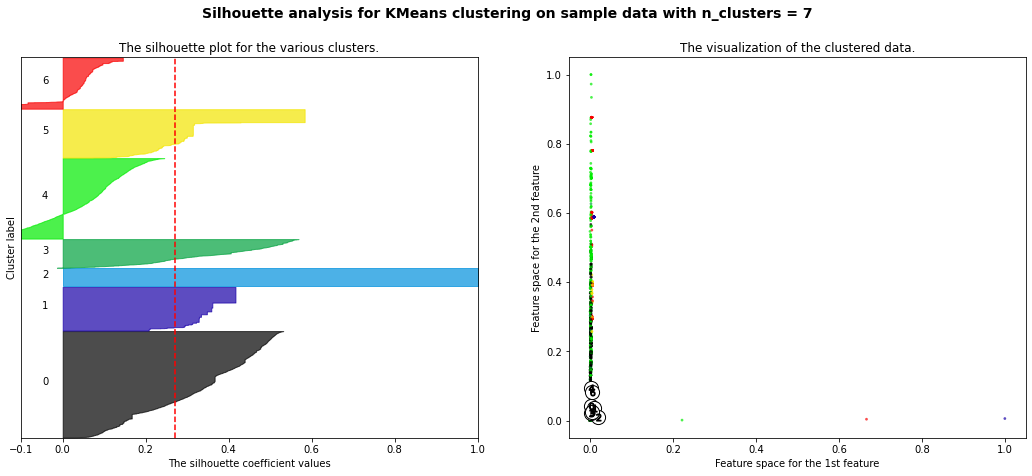

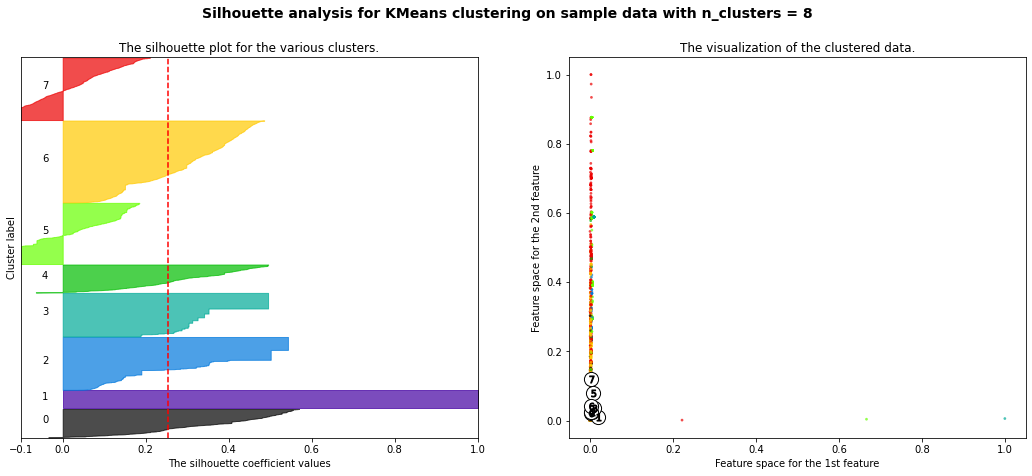

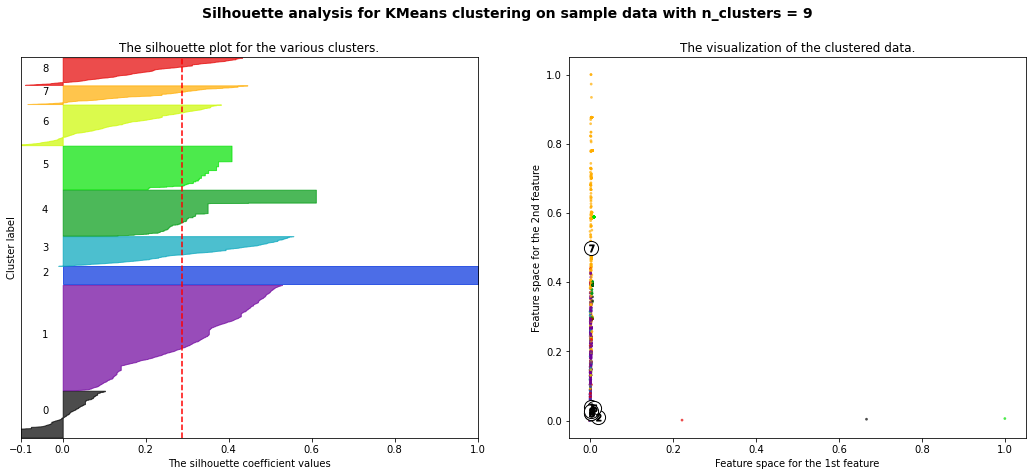

<Figure size 432x288 with 0 Axes>

In [72]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_transformed)
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette médio é :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_transformed, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_transformed[:, 0], data_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
  
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()
plt.savefig("pyLDSvis-paper.png")

===================================================================================================================================================================

In [73]:
from pandas import DataFrame
data = DataFrame(data_words,columns=['text'])
print (data)

                                                   text
0     ตั้งครรภ์ ท้องแข็ง อันตราย ตั้งครรภ์ ท้องน้อย ...
1          มีเพศสัมพันธ์ การป้องกัน เดือนขาด ประจำเดือน
2     ช่วยตัวเอง น้ำอสุจิ ผู้หญิง เป็นไร ข้างนอก ครั...
3                                      ทำแท้ง ผิดกฎหมาย
4     คุณหมอ มาโดยตลอด ประจำเดือน คุณหมอ หรือว่า รอบ...
...                                                 ...
8243  เข้าเดือน มีเพศสัมพันธ์ ป้องกัน มีเพศสัมพันธ์ ...
8244                            ครั้งสุดท้าย ประจำเดือน
8245                                         ประจำเดือน
8246       ฝากครรภ์ รังสิต ตั้งครรภ์ ตอบสนอง ค่าใช้จ่าย
8247                  ทำหมัน โรงพยาบาล ชลบุรี สิทธิบัตร

[8248 rows x 1 columns]


In [74]:
# Visualize the topics

import pyLDAvis
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.gensim

# vectorizer = CountVectorizer()
# doc_term_matrix = vectorizer.fit_transform(corpus)
# lda_model = LatentDirichletAllocation(n_components=2, random_state=888)

data = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)
pyLDAvis.display(data)

In [75]:

lda_model.fit(data_vectorized)
first_topic = lda_model.components_[0]

In [76]:
top_topic_words = first_topic.argsort()[-10:]

In [77]:
for i in top_topic_words:
    print(vectorizer.get_feature_names()[i])

ฝากครรภ์
ค่าใช้จ่าย
อันตราย
โรงพยาบาล
ท้องน้อย
ปวดท้อง
ทำหมัน
แบบนี้
คุณหมอ
ตั้งครรภ์


In [78]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

print_topics(lda_model, vectorizer)

Topic 0:
[('ตั้งครรภ์', 2059.2671199027254), ('คุณหมอ', 467.26429378148157), ('แบบนี้', 224.14701936643695), ('ทำหมัน', 214.64178541038868), ('ปวดท้อง', 212.26555964078685), ('ท้องน้อย', 178.96595326731438), ('โรงพยาบาล', 178.73265749302425), ('อันตราย', 150.93346124246327), ('ค่าใช้จ่าย', 144.2838504224061), ('ฝากครรภ์', 127.55739713381323)]
Topic 1:
[('มีเพศสัมพันธ์', 2131.4225090104383), ('มีโอกาส', 1223.364535602225), ('ฉุกเฉิน', 1218.2591478665702), ('ประจำเดือน', 1093.0447078989866), ('ถุงยาง', 894.7797755883228), ('ป้องกัน', 701.988815472645), ('แบบนี้', 563.1660784126857), ('หลังจากนั้น', 410.8329972337954), ('เข้าไป', 338.8413872374989), ('สอดใส่', 331.7821530406702)]
Topic 2:
[('ประจำเดือน', 4640.171167539853), ('ยาคุมกำเนิด', 514.7171197323893), ('คุณหมอ', 471.7596409907516), ('ยี่ห้อ', 297.65197324653747), ('มีโอกาส', 224.06016367550515), ('คุมกำเนิด', 222.1173874203782), ('ตรงเวลา', 201.5267394776749), ('พันธุ์', 175.45424752342254), ('ครั้งแรก', 148.54901425829226), ('ยาเ

In [79]:
for i,topic in enumerate(lda_model.components_):
    print(f'Top 9 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 9 words for topic #0:
['ฝากครรภ์', 'ค่าใช้จ่าย', 'อันตราย', 'โรงพยาบาล', 'ท้องน้อย', 'ปวดท้อง', 'ทำหมัน', 'แบบนี้', 'คุณหมอ', 'ตั้งครรภ์']


Top 9 words for topic #1:
['สอดใส่', 'เข้าไป', 'หลังจากนั้น', 'แบบนี้', 'ป้องกัน', 'ถุงยาง', 'ประจำเดือน', 'ฉุกเฉิน', 'มีโอกาส', 'มีเพศสัมพันธ์']


Top 9 words for topic #2:
['ยาเม็ด', 'ครั้งแรก', 'พันธุ์', 'ตรงเวลา', 'คุมกำเนิด', 'มีโอกาส', 'ยี่ห้อ', 'คุณหมอ', 'ยาคุมกำเนิด', 'ประจำเดือน']


Top 9 words for topic #3:
['ฉุกเฉิน', 'ออกจาก', 'ทำแท้ง', 'ตั้งท้อง', 'เดือนขาด', 'ต้นเดือน', 'ครบกำหนด', 'ที่ผ่านมา', 'รายเดือน', 'ผลข้างเคียง']




In [80]:
topic_values = lda_model.transform(data_vectorized)
topic_values.shape

(8248, 4)

In [81]:
documents['Topic'] = topic_values.argmax(axis=1)

In [82]:
documents.head(50)

user  ... Topic
0          \nHonestDocs User \n  ...     0
1   \nHonestDocs User 1000031\n  ...     3
2   \nHonestDocs User 1000061\n  ...     1
3   \nHonestDocs User 1000074\n  ...     3
4   \nHonestDocs User 1000159\n  ...     2
5   \nHonestDocs User 1000231\n  ...     0
6   \nHonestDocs User 1000378\n  ...     2
7   \nHonestDocs User 1000380\n  ...     3
8   \nHonestDocs User 1000406\n  ...     3
9   \nHonestDocs User 1000430\n  ...     3
10  \nHonestDocs User 1000463\n  ...     2
11  \nHonestDocs User 1000503\n  ...     2
12  \nHonestDocs User 1000520\n  ...     0
13  \nHonestDocs User 1000587\n  ...     1
14  \nHonestDocs User 1000620\n  ...     1
15  \nHonestDocs User 1000626\n  ...     3
16  \nHonestDocs User 1000647\n  ...     3
17  \nHonestDocs User 1000652\n  ...     0
18  \nHonestDocs User 1000676\n  ...     3
19  \nHonestDocs User 1000680\n  ...     0
20  \nHonestDocs User 1000694\n  ...     2
21  \nHonestDocs User 1000715\n  ...     1
22  \nHonestDocs User 1000769\n  ...     0
23  \nHonestDocs User 1000795\n  ...     0
24  \nHonestDocs User 1000824\n  ...     1
25  \nHonestDocs User 1000848\n  ...     1
26  \nHonestDocs User 1000864\n  ...     0
27  \nHonestDocs User 1000964\n  ...     0
28  \nHonestDocs User 1001052\n  ...     1
29  \nHonestDocs User 1001095\n  ...     0
30  \nHonestDocs User 1001100\n  ...     3
31  \nHonestDocs User 1001111\n  ...     0
32  \nHonestDocs User 1001128\n  ...     0
33  \nHonestDocs User 1001134\n  ...     1
34  \nHonestDocs User 1001162\n  ...     0
35  \nHonestDocs User 1001183\n  ...     1
36  \nHonestDocs User 1001263\n  ...     2
37  \nHonestDocs User 1001351\n  ...     0
38  \nHonestDocs User 1001398\n  ...     0
39  \nHonestDocs User 1001423\n  ...     0
40  \nHonestDocs User 1001438\n  ...     0
41  \nHonestDocs User 1001443\n  ...     2
42  \nHonestDocs User 1001463\n  ...     2
43  \nHonestDocs User 1001477\n  ...     0
44  \nHonestDocs User 1001484\n  ...     0
45  \nHonestDocs User 1001490\n  ...     1
46  \nHonestDocs User 1001496\n  ...     0
47  \nHonestDocs User 1001507\n  ...     0
48  \nHonestDocs User 1001511\n  ...     1
49  \nHonestDocs User 1001544\n  ...     1

[50 rows x 3 columns]

In [83]:
documents.to_csv("topic_to_text.csv")

In [84]:
documents.groupby(['Topic']).agg(['count'])

user headline_text
      count         count
Topic                    
0      2388          2388
1      2979          2979
2      2330          2330
3       551           551

In [85]:

topic_list = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:6])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: ตั้งครรภ์ คุณหมอ แบบนี้ ทำหมัน
Topic 1: มีเพศสัมพันธ์ มีโอกาส ฉุกเฉิน ประจำเดือน
Topic 2: ประจำเดือน ยาคุมกำเนิด คุณหมอ ยี่ห้อ
Topic 3: ผลข้างเคียง รายเดือน ที่ผ่านมา ครบกำหนด


In [86]:
data = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)
pyLDAvis.display(data)


In [87]:
vectorizer_tfidf = TfidfVectorizer(analyzer='word', min_df=10, stop_words=stopwords, token_pattern='[a-zA-Z0-9]{3,}',  tokenizer=tokenize )

# num chars > 3
                             # max_features=50000,             
# max number of uniq words    )
data_vectorized_tfidf = vectorizer_tfidf.fit_transform(data_words)

In [88]:
data_vectorized_tfidf.shape

(8248, 414)

In [89]:
print(data_vectorized_tfidf)

  (0, 390)	0.007631607094638971
  (0, 307)	0.005870238148806842
  (0, 66)	0.007170631053736787
  (0, 108)	0.008156451901825613
  (0, 401)	0.007136954548685782
  (0, 42)	0.007580695586797702
  (0, 116)	0.007532047575231132
  (0, 251)	0.007356568569577714
  (0, 398)	0.005991350552798341
  (0, 130)	0.007800309607689634
  (0, 232)	0.008244050645801552
  (0, 350)	0.01615069626550178
  (0, 290)	0.0074407947375142395
  (0, 347)	0.019559350680339316
  (0, 228)	0.008339275901886043
  (0, 274)	0.008339275901886043
  (0, 331)	0.008156451901825613
  (0, 43)	0.013408648532999933
  (0, 265)	0.006873026779550629
  (0, 185)	0.006154247216377452
  (0, 10)	0.013278582543297857
  (0, 275)	0.015064095150462264
  (0, 139)	0.013852845476162683
  (0, 286)	0.007999842330146107
  (0, 341)	0.0070725595020071025
  :	:
  (8239, 38)	0.4317287390346159
  (8239, 136)	0.38382923508302763
  (8239, 165)	0.14382897717352416
  (8240, 105)	0.47778911224702436
  (8240, 263)	0.4214860387636241
  (8240, 4)	0.330624319406419


In [90]:

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=4, max_iter=10,learning_method='online', random_state=100,  batch_size=128, n_jobs = -1,  learning_offset=50.)    # Number of topics
                                                    
# Max learning iterations                                                                              
# Random state                                            
# n docs in each learning iter                                      
# compute perplexity every n iters, default: Don't                                       
# Use all available CPUs
                                     

lda_output_tfidf = lda_model.fit_transform(data_vectorized_tfidf)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [91]:
lda_output_tfidf.shape

(8248, 4)

In [92]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized_tfidf))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized_tfidf))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -76619.7152420327
Perplexity:  273.74209833827797
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [93]:
# Log Likelihood:  -175674.80970229727
# Perplexity:  107.3059691159183
# {'batch_size': 128,
#  'doc_topic_prior': None,
#  'evaluate_every': -1,
#  'learning_decay': 0.7,
#  'learning_method': 'online',
#  'learning_offset': 50.0,
#  'max_doc_update_iter': 100,
#  'max_iter': 10,
#  'mean_change_tol': 0.001,
#  'n_components': 4,
#  'n_jobs': -1,
#  'perp_tol': 0.1,
#  'random_state': 100,
#  'topic_word_prior': None,
#  'total_samples': 1000000.0,
#  'verbose': 0}
